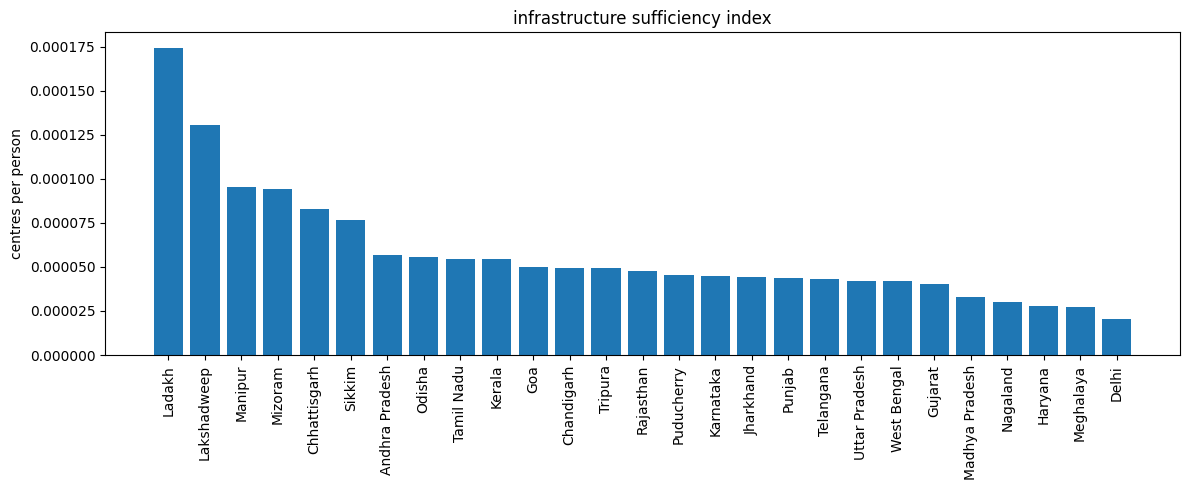

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

centres=pd.read_csv("../sql/data/Aadhar.csv")
centres=centres.rename(columns={"State":"state","No. of centres":"centres"})
centres["centres"]=pd.to_numeric(centres["centres"],errors="coerce")

population=pd.read_csv("../sql/data/Population of Indian states 2025.csv")
population=population.rename(columns={"State/UT":"state","Population 2025":"population"})
population["population"]=population["population"].astype(str).str.replace(",","").astype(int)

df=centres.merge(population,on="state",how="inner")
df["infrastructure_sufficiency"]=df["centres"]/df["population"]
df=df.sort_values("infrastructure_sufficiency",ascending=False)

plt.figure(figsize=(12,5))
plt.bar(df["state"],df["infrastructure_sufficiency"])
plt.xticks(rotation=90)
plt.ylabel("centres per person")
plt.title("infrastructure sufficiency index")
plt.tight_layout()
plt.show()
